<a href="https://colab.research.google.com/github/preeyam2000sahu/MNIST_Number_ClassifierCNN/blob/main/Number_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [29]:
num_classes=10
input_shape=(28,28,1)

In [30]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

Normalization of the grayscale pixel values between 0 and 255

In [31]:
x_train=(x_train.astype('float32'))/255
x_test=(x_test.astype('float32'))/255
print(x_train.shape)
x_train=np.expand_dims(x_train,-1);
x_test=np.expand_dims(x_test,-1);
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def show_image_and_label(x, y):
    x_reshaped = x.reshape(28,28)
    plt.imshow(x_reshaped, cmap= "gray",
              interpolation="nearest")
    plt.axis("off")
    plt.show()
    print(y)

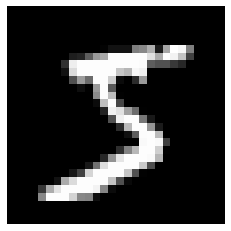

5
(60000,)


In [33]:
x_pixels = np.array(x_train[0], 'float32')
x_pixels /= 255
show_image_and_label(x_pixels, y_train[0])
print(y_train.shape)

Binary class matrices

In [34]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [35]:
model=keras.Sequential(
    [
     keras.Input(input_shape),
     layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes,activation='softmax'),




    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [36]:
batch=128
epochs=15
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 43s 100ms/step - loss: 0.7692 - accuracy: 0.7670 - val_loss: 0.0833 - val_accuracy: 0.9777
Epoch 2/15
422/422 [==============================] - 43s 102ms/step - loss: 0.1205 - accuracy: 0.9633 - val_loss: 0.0610 - val_accuracy: 0.9822
Epoch 3/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0893 - accuracy: 0.9726 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 0.0437 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 42s 101ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0382 - val_accuracy: 0.9903
Epoch 6/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0560 - accuracy: 0.9822 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0343 - val_accu

In [37]:
score=model.evaluate(x_test,y_test,verbose=0)
print("test_loss:",score[0])
print("test_acc",score[1])

test_loss: 0.02252396196126938
test_acc 0.9923999905586243


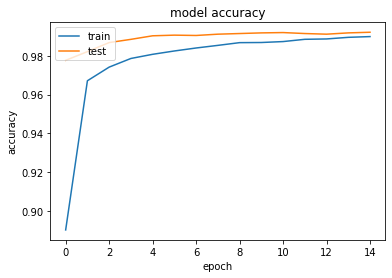

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

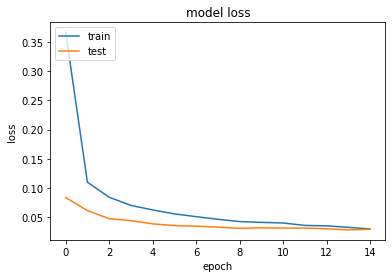

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()